# Sesión 6: Introducción al uso de clases en Python para análisis de datos con Pandas

## Ejemplos

**Ejemplo 6.1:**

In [ ]:
import pandas as pd

# Datos simulados
df_semana1 = pd.DataFrame({
    'Hora': ['06:00', '07:00', '08:00'],
    'Fase R (V)': [220.5, 221.3, 219.8],
    'Fase S (V)': [220.2, 219.8, 220.5],
    'Fase T (V)': [219.1, 220.0, 218.9],
}).set_index('Hora')

df_semana2 = pd.DataFrame({
    'Hora': ['06:00', '07:00', '08:00'],
    'Fase R (V)': [222.0, 221.7, 223.2],
    'Fase S (V)': [222.1, 221.6, 223.3],
    'Fase T (V)': [221.9, 221.8, 223.0],
}).set_index('Hora')

In [ ]:
import matplotlib.pyplot as plt # Las bibliotecas se llaman fuera de la clase (normal)

class AnalizadorDeVoltaje:
    def __init__(self, df): # Esto se usa tal cual en las clases
        self.df = df        # que aplicaremos. "Guarda" el objeto df para todas las funciones.

    def voltaje_promedio(self):
        return self.df[['Fase R (V)', 'Fase S (V)', 'Fase T (V)']].mean(axis=1)

    def detectar_anomalias(self, umbral):
        promedio = self.voltaje_promedio()
        return self.df[promedio > umbral]

    def maximos_por_fase(self):
        return self.df.max()

    def resumen_estadistico(self):
        return self.df.describe()

    def horas_normales(self, umbral_bajo, umbral_alto):
        promedio = self.voltaje_promedio()
        return self.df[promedio.between(umbral_bajo, umbral_alto)]

    def graficar_voltaje(self):
        promedio = self.voltaje_promedio()
        ax = self.df.plot(marker='o')
        promedio.plot(ax=ax, style='--', color='black', label='Promedio')
        plt.title('Voltajes por hora')
        plt.ylabel('Voltaje (V)')
        plt.grid(True)
        plt.legend()
        plt.show()


**Ejemplo 6.2:**

In [ ]:
analizador1 = AnalizadorDeVoltaje(df_semana1)
analizador2 = AnalizadorDeVoltaje(df_semana2)

print("Semana 1 - Promedios")
print(analizador1.voltaje_promedio())

print("\nSemana 2 - Anomalías (> 221.0 V):")
print(analizador2.detectar_anomalias(221.0))

print("\nSemana 2 - Máximos por fase:")
print(analizador2.maximos_por_fase())


Semana 1 - Promedios
Hora
06:00    219.933333
07:00    220.366667
08:00    219.733333
dtype: float64

Semana 2 - Anomalías (> 221.0 V):
       Fase R (V)  Fase S (V)  Fase T (V)
Hora                                     
06:00       222.0       222.1       221.9
07:00       221.7       221.6       221.8
08:00       223.2       223.3       223.0

Semana 2 - Máximos por fase:
Fase R (V)    223.2
Fase S (V)    223.3
Fase T (V)    223.0
dtype: float64


**Ejemplo 6.3:**

In [ ]:
def voltaje_promedio(df):
    return df[['Fase R (V)', 'Fase S (V)', 'Fase T (V)']].mean(axis=1)

def detectar_anomalias(df, umbral):
    return df[voltaje_promedio(df) > umbral]

def horas_normales(df, umbral_bajo, umbral_alto):
    promedio = voltaje_promedio(df)
    return df[promedio.between(umbral_bajo, umbral_alto)]

def maximos_por_fase(df):
    return df.max()

def graficar_voltaje(df):
    promedio = voltaje_promedio(df)
    ax = df.plot(marker='o')
    promedio.plot(ax=ax, style='--', color='black', label='Promedio')
    plt.title('Voltajes por hora')
    plt.ylabel('Voltaje (V)')
    plt.grid(True)
    plt.legend()
    plt.show()


Y cada vez:

Hora
06:00    219.933333
07:00    220.366667
08:00    219.733333
dtype: float64
       Fase R (V)  Fase S (V)  Fase T (V)
Hora                                     
06:00       222.0       222.1       221.9
07:00       221.7       221.6       221.8
08:00       223.2       223.3       223.0


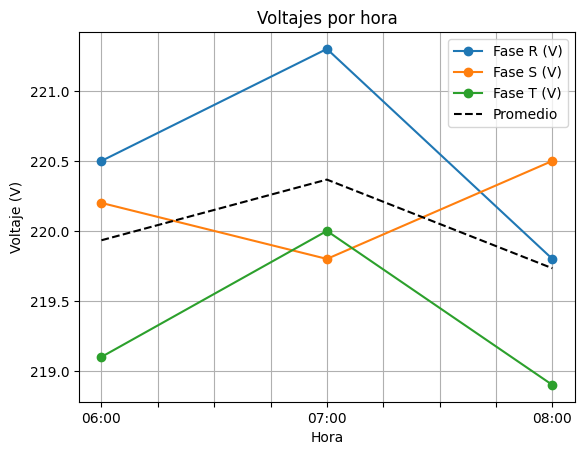

In [ ]:
print(voltaje_promedio(df_semana1))
print(detectar_anomalias(df_semana2, 221.0))
graficar_voltaje(df_semana1)

## Ejercicios

**Ejercicio 6.1** Comparación de voltajes.

Usando los objetos analizador1 y analizador2, imprime los promedios de voltaje de cada semana. ¿Cuál semana tuvo en promedio más voltaje?

In [ ]:
# prom1 = analizador1.voltaje_promedio().mean()


#print(f"Promedio semana 1: {prom1:.2f}")


Promedio semana 1: 220.01
Promedio semana 2: 222.29
